In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Task 1.

Read the csv file `abc.csv` into a DataFrame.

In [16]:
df=pd.read_csv('abc.csv')
print(df.shape)
df.head()

(120, 3)


,A,B,C
0,204.0,285.0,248.0
1,197.0,303.0,255.0
2,201.0,289.0,250.0
3,201.0,301.0,256.0
4,195.0,304.0,255.0


How many duplicated rows are there in the dataframe?

In [19]:
df.duplicated().sum()

14

How many missing values are there in each column?

In [20]:
df.isna().sum()

A    10
B    10
C    20
dtype: int64

Clean the DataFrame:
* For column A, replace NaNs by 200
* For column B, replace NaNs by the mean of column B
* For column C, replace NaNs by the average value of A and B of the same row.
* Ensure that all columns have integer type
* Drop duplicate rows; how many rows are left in the DataFrame?

In [21]:
df['A'].fillna(200,inplace=True)

In [22]:
df['B'].fillna(df['B'].mean(),inplace=True)

In [23]:
df['C']=df.apply(lambda row: row[['A','B']].mean(), axis=1)

In [24]:
df=df.astype(int)
df.dtypes

A    int32
B    int32
C    int32
dtype: object

In [25]:
df.duplicated().sum()

24

In [26]:
df.drop_duplicates(inplace=True)
print(df.shape)
df.head()

(96, 3)


,A,B,C
0,204,285,244
1,197,303,250
2,201,289,245
3,201,301,251
4,195,304,249


## Task 2.

Read the csv file `avg_wages.csv` into a dataframe `dfw`.

This dataset comprises the average wages of the countries of European Union between 2006 and 2020.

In [20]:
dfw=pd.read_csv('avg_wages.csv')

dfw.head()

,LOCATION,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,AUT,50524.506564,50814.325436,51677.710303,52578.272037,52334.294580,51755.116093,52070.667736,52128.135527,52309.655188,52686.043960,53169.977860,53136.352960,53325.486022,53690.031378,53131.847260
1,BEL,53327.449932,53224.860383,53452.929608,54193.829082,53969.024719,54520.140610,54950.872490,55503.367518,55808.797932,55427.286365,55525.989944,55130.181974,55387.695298,56021.805354,54326.598175
2,CZE,22861.847008,23545.285901,23672.731508,23578.221573,24309.372522,24508.119622,24557.712349,24404.413629,24920.538327,25660.226169,26574.905825,27930.690363,29420.908126,30354.848712,29884.588816
3,DEU,46546.461494,46415.410186,46632.728469,46645.963088,47054.100469,48025.575290,48682.548875,49158.707242,50001.028820,51171.531009,51901.819556,52454.146078,53220.549493,54041.356470,53744.998601
4,DNK,51745.235763,52309.176187,53017.211202,54302.633627,54928.317132,54643.797654,54570.075681,54924.954335,55975.891349,56959.843690,57043.390343,57355.115156,57794.204720,57967.313949,58429.652139


Read the csv file `employment.csv` into a dataframe `dfe`.

This dataset comprises the employment rate of the countries of European Union between 2006 and 2020.

In [22]:
dfe=pd.read_csv('employment.csv')

In [23]:
dfe.head()

,Year,AUT,BEL,CZE,DEU,DNK,ESP,EST,FIN,FRA,...,ITA,LTU,LUX,LVA,NLD,POL,PRT,SVK,SVN,SWE
0,Y2006,68.575,61.000,65.275,67.150,77.375,65.025,68.425,69.35,64.150,...,58.325,63.625,63.600,65.900,71.575,54.450,67.625,59.425,66.550,73.125
1,Y2007,69.875,62.025,66.075,68.975,77.000,65.800,69.725,70.30,64.725,...,58.575,65.000,64.150,68.125,73.450,57.025,67.600,60.700,67.750,74.175
2,Y2008,70.825,62.400,66.550,70.100,76.325,64.475,70.075,71.05,65.300,...,58.650,64.400,63.425,68.225,74.925,59.225,68.025,62.250,68.575,74.325
3,Y2009,70.325,61.600,65.375,69.375,73.525,59.950,64.200,67.90,64.425,...,56.900,59.875,65.200,60.050,76.175,57.175,62.975,61.850,67.075,71.650
4,Y2010,70.775,62.025,64.975,70.300,71.800,58.850,61.950,67.15,64.375,...,56.250,57.550,65.200,58.200,75.450,56.975,62.250,60.425,65.525,71.600


### Question 1.
We want to combine those tables such that each row comprises a country and a year, as well as the avg. wages and the employment rate of that country in that year; i.e., the result should look like this:

In [13]:
"""
  LOCATION  Year         Wages  Emprate
0      AUT  2006  50524.506564   68.575
1      BEL  2006  53327.449932   61.000
2      CZE  2006  22861.847008   65.275
3      DEU  2006  46546.461494   67.150
4      DNK  2006  51745.235763   77.375
""";

**Hint.** You need to melt the tables (converting them to long format) before merging them.

In [25]:
dfw=dfw.melt(id_vars=['LOCATION'],value_vars=['Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020'], 
        var_name='Year', value_name='Wages')

In [26]:
dfe=dfe.melt(id_vars=['Year'],value_vars=['AUT', 'BEL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA',
       'GRC', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'NLD', 'POL', 'PRT',
       'SVK', 'SVN', 'SWE'], 
        var_name='LOCATION', value_name='Emprate')

In [30]:
df_total=dfw.merge(dfe, on=['LOCATION','Year'])

In [31]:
df_total['Year']=df_total['Year'].map(lambda x: x[1:5])

In [32]:
df_total.head()

,LOCATION,Year,Wages,Emprate
0,AUT,2006,50524.506564,68.575
1,BEL,2006,53327.449932,61.000
2,CZE,2006,22861.847008,65.275
3,DEU,2006,46546.461494,67.150
4,DNK,2006,51745.235763,77.375


### Question 2.

1. Find the average per country for:
    1. the avg. wages, and
    2. the employment rate 

Call the result `df2`, it should look like this:

In [21]:
"""
  LOCATION         Wages    Emprate
0      AUT  52355.494860  71.233333
1      BEL  54718.055292  62.528333
2      CZE  25745.627363  69.158333
3      DEU  49713.128343  72.178719
4      DNK  55464.454195  73.465000
""";

In [33]:
df2=dfw.pivot_table(values='Wages', index='LOCATION', aggfunc='mean')\
.merge(dfe.pivot_table(values='Emprate', index='LOCATION', aggfunc='mean'),\
       on=['LOCATION']).reset_index()

In [34]:
df2.head()

,LOCATION,Wages,Emprate
0,AUT,52355.494860,71.233333
1,BEL,54718.055292,62.528333
2,CZE,25745.627363,69.158333
3,DEU,49713.128343,72.178719
4,DNK,55464.454195,73.465000



2. Then, compare those two groups of countries in terms of avg. wages and employment rate.
    * `G1 = ['DEU', 'DNK', 'LUX', 'AUT', 'NLD', 'FRA', 'SWE']`
    * `G2 = ['SVK', 'LTU', 'LVA', 'EST', 'POL', 'POR', 'CZE', 'HUN']`   
* Prove your findings with suitable t-tests. 


𝐻0:𝜇G1=𝜇G2 
𝐻𝑎:𝜇G1≠𝜇G2

In [35]:
A = (df2.loc[df2['LOCATION'].isin(['DEU', 'DNK', 'LUX', 'AUT', 'NLD', 'FRA', 'SWE'])])['Wages']
B =(df2.loc[df2['LOCATION'].isin(['SVK', 'LTU', 'LVA', 'EST', 'POL', 'POR', 'CZE', 'HUN'])])['Wages']
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='two-sided')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    

52486.680588089526 23581.09219314584
p-value 3.4947673828925164e-07
We reject the null hypothesis


With 95% probability, it can be argued that the average wages in the 2 groups have statistically significant differences

In [31]:
A = (df2.loc[df2['LOCATION'].isin(['DEU', 'DNK', 'LUX', 'AUT', 'NLD', 'FRA', 'SWE'])])['Emprate']
B =(df2.loc[df2['LOCATION'].isin(['SVK', 'LTU', 'LVA', 'EST', 'POL', 'POR', 'CZE', 'HUN'])])['Emprate']
print(A.mean(), B.mean())

alpha = 0.05  # level of significance

tstat, pval = stats.ttest_ind(a=A, b=B, alternative='two-sided')
print("p-value", pval)

if pval < alpha: 
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

71.11719799999999 65.59666666666666
p-value 0.01910835286799817
We reject the null hypothesis


With 95% probability, it can be argued that the employment rate in the 2 groups have statistically significant differences

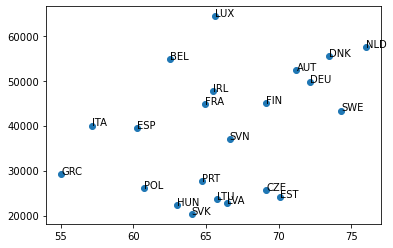

In [41]:
plt.scatter(df2['Emprate'], df2['Wages'])
for location, Wages, Emprate in df2.itertuples(None,None):
    plt.text(x=Emprate, y=Wages, s=location)